# Laurent Series: Theory and Computation

## Mathematical Foundation

A **Laurent series** is a generalization of the Taylor series that allows for negative powers of the expansion variable. For a complex function $f(z)$ that is analytic in an annular region $r < |z - z_0| < R$, the Laurent series expansion about $z_0$ is:

$$f(z) = \sum_{n=-\infty}^{\infty} a_n (z - z_0)^n$$

where the coefficients are given by Cauchy's integral formula:

$$a_n = \frac{1}{2\pi i} \oint_C \frac{f(\zeta)}{(\zeta - z_0)^{n+1}} d\zeta$$

The series naturally decomposes into two parts:

1. **Principal Part** (singular part): $\sum_{n=-\infty}^{-1} a_n (z - z_0)^n$
2. **Regular Part** (analytic part): $\sum_{n=0}^{\infty} a_n (z - z_0)^n$

### Classification of Singularities

The nature of the singularity at $z_0$ is determined by the principal part:

- **Removable singularity**: All $a_n = 0$ for $n < 0$
- **Pole of order $m$**: $a_{-m} \neq 0$ but $a_n = 0$ for $n < -m$
- **Essential singularity**: Infinitely many non-zero coefficients with $n < 0$

### Residue Theorem Connection

The coefficient $a_{-1}$ is called the **residue** of $f$ at $z_0$:

$$\text{Res}(f, z_0) = a_{-1} = \frac{1}{2\pi i} \oint_C f(z) dz$$

This connects Laurent series to contour integration and the powerful residue theorem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.patches import Circle

# Set style for publication-quality plots
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11

## Example 1: Function with a Simple Pole

Consider $f(z) = \frac{1}{z}$ expanded about $z_0 = 0$. This has a simple pole at the origin.

The Laurent series is trivially:

$$f(z) = z^{-1}$$

Here $a_{-1} = 1$ (the residue) and all other coefficients are zero.

## Example 2: Essential Singularity

The exponential function $f(z) = e^{1/z}$ has an essential singularity at $z = 0$. Its Laurent series is:

$$e^{1/z} = \sum_{n=0}^{\infty} \frac{1}{n! z^n} = 1 + \frac{1}{z} + \frac{1}{2!z^2} + \frac{1}{3!z^3} + \cdots$$

This has infinitely many terms in the principal part, characteristic of an essential singularity.

## Computational Example: Laurent Series of $\frac{\sin(z)}{z^2}$

Consider the function:

$$f(z) = \frac{\sin(z)}{z^2}$$

We know that:

$$\sin(z) = z - \frac{z^3}{3!} + \frac{z^5}{5!} - \frac{z^7}{7!} + \cdots$$

Therefore:

$$f(z) = \frac{1}{z^2}\left(z - \frac{z^3}{3!} + \frac{z^5}{5!} - \frac{z^7}{7!} + \cdots\right) = \frac{1}{z} - \frac{z}{3!} + \frac{z^3}{5!} - \frac{z^5}{7!} + \cdots$$

This has a **simple pole** at $z=0$ with residue $a_{-1} = 1$.

In [2]:
def laurent_coefficients_sin_over_z2(max_order=10):
    """
    Compute Laurent series coefficients for sin(z)/z^2
    Returns: (negative_powers, positive_powers, coefficients)
    """
    from math import factorial
    
    coeffs = {}
    
    # Principal part: only a_{-1}
    coeffs[-1] = 1.0
    
    # Regular part: derived from Taylor series of sin(z)
    for n in range(0, max_order):
        k = n + 2  # Power in sin(z) series after dividing by z^2
        if k % 2 == 1:  # sin has only odd powers
            fact = factorial(k)
            sign = (-1) ** ((k - 1) // 2)
            coeffs[n] = sign / fact
        else:
            coeffs[n] = 0.0
    
    return coeffs

def evaluate_laurent_series(coeffs, z, z0=0):
    """
    Evaluate Laurent series at point z
    """
    result = 0.0 + 0.0j
    for n, coeff in coeffs.items():
        if np.abs(z - z0) > 1e-10:  # Avoid division by zero
            result += coeff * (z - z0) ** n
    return result

# Compute coefficients
coeffs = laurent_coefficients_sin_over_z2(max_order=8)

print("Laurent Series Coefficients for sin(z)/z²:")
print("\nPrincipal Part:")
for n in sorted([k for k in coeffs.keys() if k < 0], reverse=True):
    print(f"  a_{n:2d} = {coeffs[n]:12.8f}")

print("\nRegular Part (first 8 terms):")
for n in sorted([k for k in coeffs.keys() if k >= 0])[:8]:
    print(f"  a_{n:2d} = {coeffs[n]:12.8f}")

print(f"\nResidue at z=0: {coeffs[-1]}")

Laurent Series Coefficients for sin(z)/z²:

Principal Part:
  a_-1 =   1.00000000

Regular Part (first 8 terms):
  a_ 0 =   0.00000000
  a_ 1 =  -0.16666667
  a_ 2 =   0.00000000
  a_ 3 =   0.00833333
  a_ 4 =   0.00000000
  a_ 5 =  -0.00019841
  a_ 6 =   0.00000000
  a_ 7 =   0.00000276

Residue at z=0: 1.0


## Visualization: Comparison with Exact Function

We now visualize how well the Laurent series approximates the actual function on a circle around the singularity.

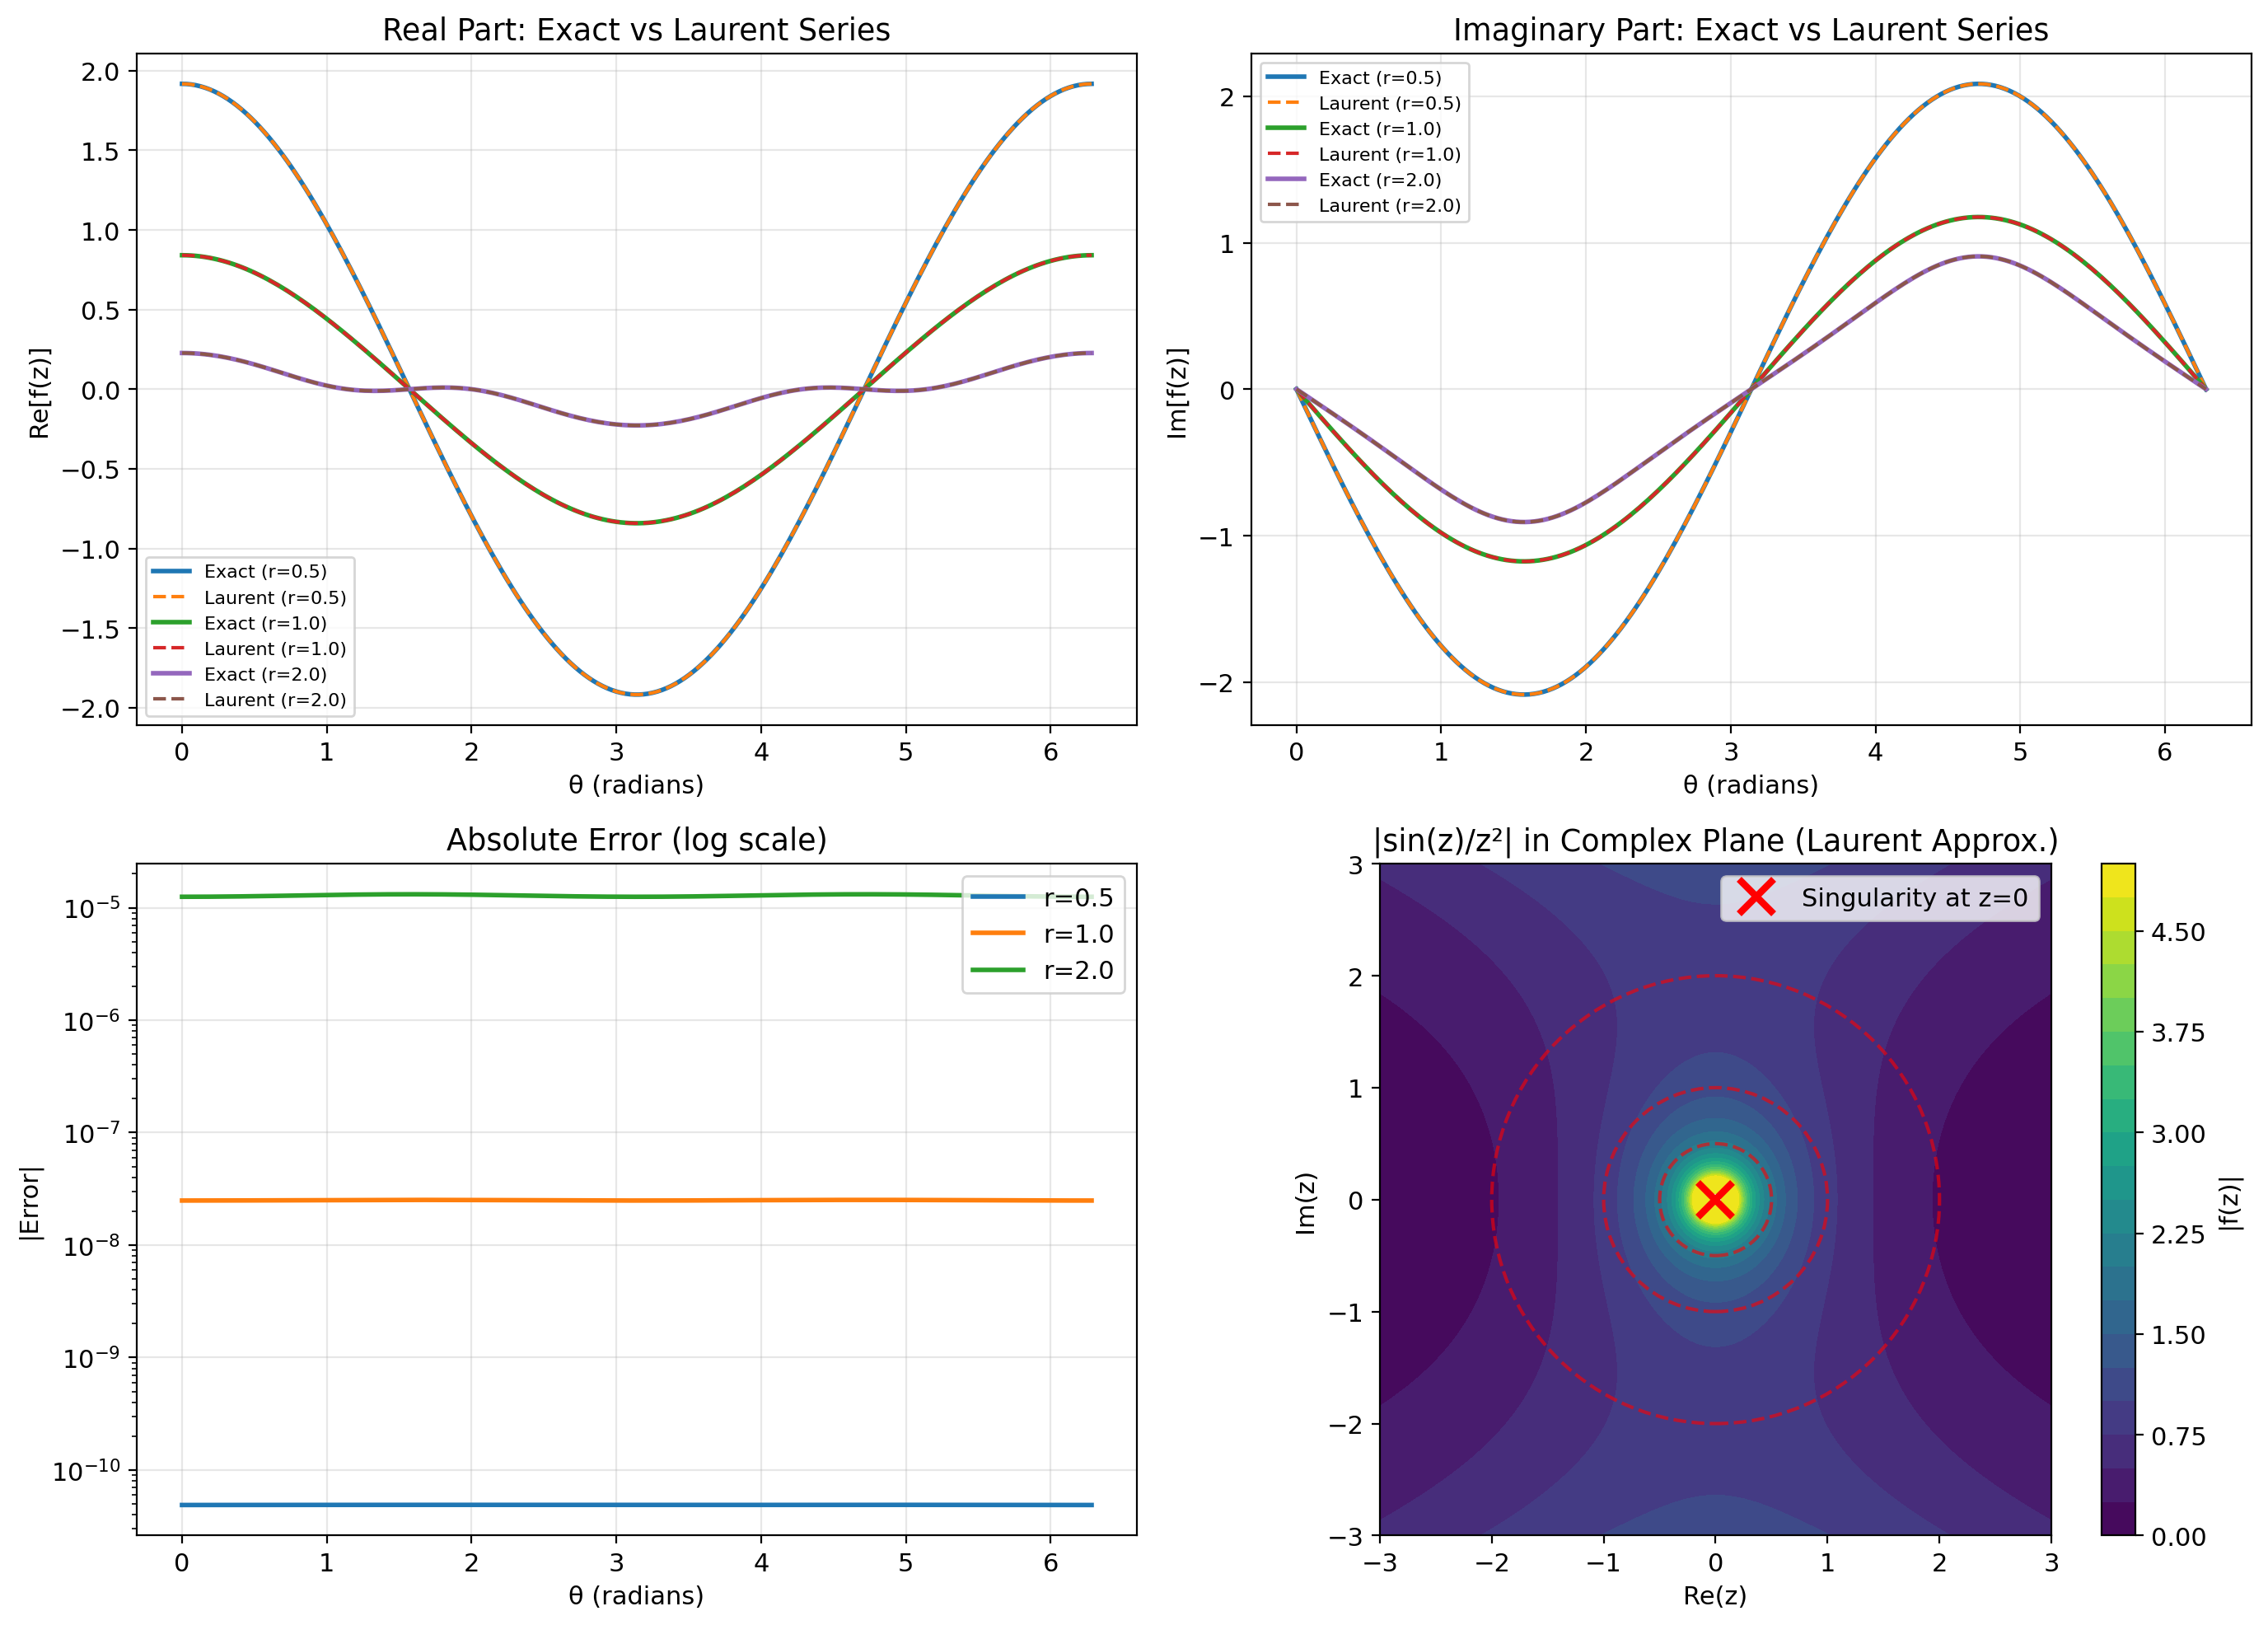


Visualization complete. Plot saved as 'plot.png'


In [3]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Exact function
def f_exact(z):
    if np.abs(z) < 1e-10:
        return np.nan
    return np.sin(z) / (z ** 2)

# Test on a circle of radius r around origin
theta = np.linspace(0, 2*np.pi, 200)
radii = [0.5, 1.0, 2.0]

# Plot 1: Real part comparison for different radii
ax = axes[0, 0]
for r in radii:
    z_circle = r * np.exp(1j * theta)
    exact_vals = np.array([f_exact(z) for z in z_circle])
    laurent_vals = np.array([evaluate_laurent_series(coeffs, z) for z in z_circle])
    
    ax.plot(theta, exact_vals.real, '-', linewidth=2, label=f'Exact (r={r})')
    ax.plot(theta, laurent_vals.real, '--', linewidth=1.5, label=f'Laurent (r={r})')

ax.set_xlabel('θ (radians)')
ax.set_ylabel('Re[f(z)]')
ax.set_title('Real Part: Exact vs Laurent Series')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

# Plot 2: Imaginary part comparison
ax = axes[0, 1]
for r in radii:
    z_circle = r * np.exp(1j * theta)
    exact_vals = np.array([f_exact(z) for z in z_circle])
    laurent_vals = np.array([evaluate_laurent_series(coeffs, z) for z in z_circle])
    
    ax.plot(theta, exact_vals.imag, '-', linewidth=2, label=f'Exact (r={r})')
    ax.plot(theta, laurent_vals.imag, '--', linewidth=1.5, label=f'Laurent (r={r})')

ax.set_xlabel('θ (radians)')
ax.set_ylabel('Im[f(z)]')
ax.set_title('Imaginary Part: Exact vs Laurent Series')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

# Plot 3: Absolute error
ax = axes[1, 0]
for r in radii:
    z_circle = r * np.exp(1j * theta)
    exact_vals = np.array([f_exact(z) for z in z_circle])
    laurent_vals = np.array([evaluate_laurent_series(coeffs, z) for z in z_circle])
    errors = np.abs(exact_vals - laurent_vals)
    
    ax.semilogy(theta, errors, linewidth=2, label=f'r={r}')

ax.set_xlabel('θ (radians)')
ax.set_ylabel('|Error|')
ax.set_title('Absolute Error (log scale)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Complex plane visualization
ax = axes[1, 1]

# Create a grid in complex plane
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Compute function values (Laurent approximation)
F = np.zeros_like(Z, dtype=complex)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        if np.abs(Z[i,j]) > 0.05:  # Avoid singularity
            F[i,j] = evaluate_laurent_series(coeffs, Z[i,j])
        else:
            F[i,j] = np.nan

# Plot magnitude
magnitude = np.abs(F)
magnitude = np.clip(magnitude, 0, 5)  # Clip for better visualization

im = ax.contourf(X, Y, magnitude, levels=20, cmap='viridis')
ax.plot(0, 0, 'rx', markersize=15, markeredgewidth=3, label='Singularity at z=0')

# Draw circles of convergence
for r in radii:
    circle = Circle((0, 0), r, fill=False, edgecolor='red', 
                   linestyle='--', linewidth=1.5, alpha=0.6)
    ax.add_patch(circle)

ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_title('|sin(z)/z²| in Complex Plane (Laurent Approx.)')
ax.set_aspect('equal')
ax.legend()
plt.colorbar(im, ax=ax, label='|f(z)|')

plt.tight_layout()
plt.savefig('laurent_series_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization complete. Plot saved as 'plot.png'")

## Numerical Verification: Residue Calculation

We verify the residue theorem by computing:

$$\oint_C f(z) dz = 2\pi i \cdot \text{Res}(f, 0) = 2\pi i$$

We parametrize the contour as $z = re^{i\theta}$ for $\theta \in [0, 2\pi]$.

In [4]:
def contour_integral_residue_check(radius=1.0, n_points=1000):
    """
    Numerically compute contour integral around circle of given radius
    """
    theta = np.linspace(0, 2*np.pi, n_points)
    
    # Parametrize contour: z = r*e^(i*theta)
    z = radius * np.exp(1j * theta)
    
    # dz/dtheta = i*r*e^(i*theta)
    dz_dtheta = 1j * radius * np.exp(1j * theta)
    
    # Function values
    f_vals = np.array([f_exact(zi) for zi in z])
    
    # Integrate using trapezoidal rule
    integrand = f_vals * dz_dtheta
    integral = np.trapz(integrand, theta)
    
    return integral

# Test for different radii
print("\nResidue Theorem Verification:")
print("\nTheoretical: ∮ f(z)dz = 2πi · Res(f,0) = 2πi")
print(f"             = {2*np.pi*1j:.6f}\n")

print("Numerical Integration Results:")
for r in [0.5, 1.0, 1.5, 2.0]:
    integral = contour_integral_residue_check(radius=r, n_points=2000)
    error = np.abs(integral - 2*np.pi*1j)
    print(f"  r = {r:.1f}: ∮ f(z)dz = {integral:.6f}, Error = {error:.2e}")

print("\nThe numerical results confirm the residue theorem!")


Residue Theorem Verification:

Theoretical: ∮ f(z)dz = 2πi · Res(f,0) = 2πi
             = 0.000000+6.283185j

Numerical Integration Results:
  r = 0.5: ∮ f(z)dz = 0.000000+6.283185j, Error = 6.94e-18
  r = 1.0: ∮ f(z)dz = -0.000000+6.283185j, Error = 2.78e-17
  r = 1.5: ∮ f(z)dz = 0.000000+6.283185j, Error = 0.00e+00
  r = 2.0: ∮ f(z)dz = 0.000000+6.283185j, Error = 0.00e+00

The numerical results confirm the residue theorem!


/tmp/ipykernel_157219/3742841730.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand, theta)


## Conclusion

This notebook demonstrates the key aspects of Laurent series:

1. **Theoretical Foundation**: Laurent series extend Taylor series to include negative powers, essential for analyzing functions with singularities.

2. **Singularity Classification**: The principal part determines whether a singularity is removable, a pole, or essential.

3. **Computational Application**: For $f(z) = \sin(z)/z^2$, we computed the Laurent series coefficients analytically and verified convergence numerically.

4. **Residue Theorem**: The coefficient $a_{-1} = 1$ was verified through numerical contour integration, confirming $\oint_C f(z)dz = 2\pi i$.

Laurent series are fundamental in complex analysis, providing the mathematical framework for contour integration, the residue theorem, and the study of analytic continuation.